# Project: Econocimiento de movimientos coorporales

**Objetivo** Analizar los dosr archivos .CSV generados por el script 'process.py'
1.  `datos_analisis.csv`: Contiene metadata de cada video
2.  `datosmediapipe.csv`: Contiene los landmarks de cada pose



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mediapipe as mp

# Set some display options for better visualization
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 150)

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
analysis_path = '../data/processed/datos_analisis.csv'
pose_path = '../data/processed/datosmediapipe.csv'

try:
    df_analisis = pd.read_csv(analysis_path)
    df_pose = pd.read_csv(pose_path)
    print("Datasets loaded successfully!")
    print(f"Analysis DataFrame shape: {df_analisis.shape}")
    print(f"Pose DataFrame shape: {df_pose.shape}")
except FileNotFoundError as e:
    print(f"ERROR: {e}")
    print("Please make sure the CSV files are in the correct directory ('./data/processed/').")

Datasets loaded successfully!
Analysis DataFrame shape: (6245, 12)
Pose DataFrame shape: (6235, 136)


## Part I: Analysis of Video Metadata (`df_analisis`)

First, let's explore the high-level characteristics of our video collection. This helps us understand the conditions under which the data was collected and check for balance across the different action categories.


In [5]:
# Display the first few rows of the analysis dataframe
print("First 5 rows of df_analisis:")
display(df_analisis.head())

# Get a summary of the dataframe's structure and data types
print("\nDataFrame Info:")
df_analisis.info()

# Check for any missing values
print("\nMissing values per column:")
print(df_analisis.isnull().sum())

First 5 rows of df_analisis:


,action,video_filename,frame_idx,timestamp_sec,width,height,fps,total_frames,duration_sec,luminance_mean,luminance_std,motion_mad
0,caminar-adelante,10caminar.mp4,0,0.000000,1920,1080,30.0,84,2.8,46.278017,74.154217,NaN
1,caminar-adelante,10caminar.mp4,1,0.033333,1920,1080,30.0,84,2.8,46.277486,74.171343,0.207409
2,caminar-adelante,10caminar.mp4,2,0.066667,1920,1080,30.0,84,2.8,46.268985,74.169770,0.221714
3,caminar-adelante,10caminar.mp4,3,0.100000,1920,1080,30.0,84,2.8,46.259497,74.169242,0.217096
4,caminar-adelante,10caminar.mp4,4,0.133333,1920,1080,30.0,84,2.8,46.239550,74.156945,0.216269



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6245 entries, 0 to 6244
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   action          6245 non-null   object 
 1   video_filename  6245 non-null   object 
 2   frame_idx       6245 non-null   int64  
 3   timestamp_sec   6245 non-null   float64
 4   width           6245 non-null   int64  
 5   height          6245 non-null   int64  
 6   fps             6245 non-null   float64
 7   total_frames    6245 non-null   int64  
 8   duration_sec    6245 non-null   float64
 9   luminance_mean  6245 non-null   float64
 10  luminance_std   6245 non-null   float64
 11  motion_mad      6155 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 585.6+ KB

Missing values per column:
action             0
video_filename     0
frame_idx          0
timestamp_sec      0
width              0
height             0
fps                0
total_f

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\2290327535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_counts.index, y=video_counts.values, palette='viridis')


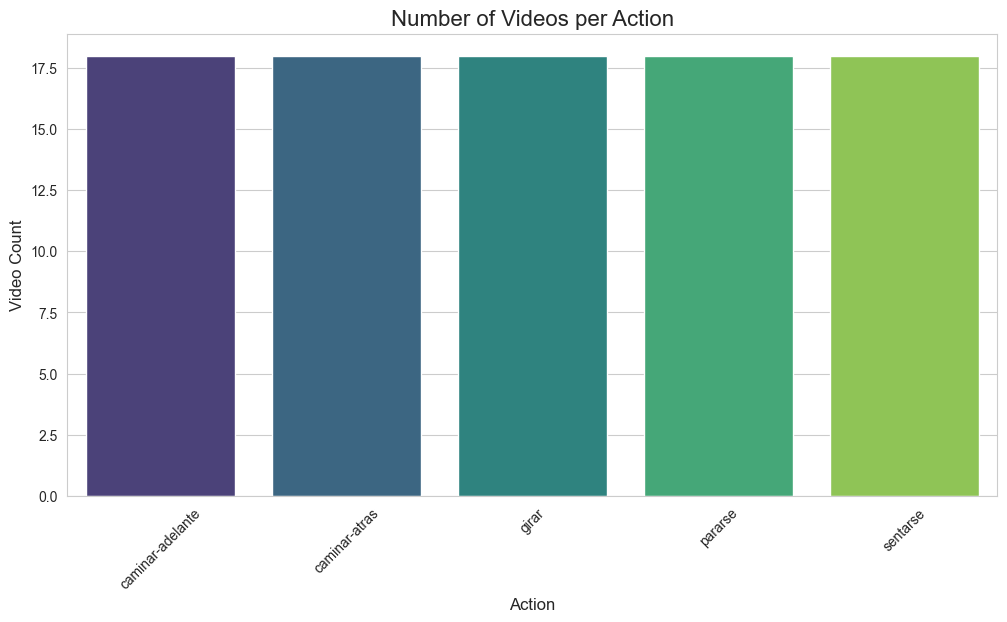

Video counts per action:
 action
caminar-adelante    18
caminar-atras       18
girar               18
pararse             18
sentarse            18
Name: video_filename, dtype: int64


In [ ]:
# --- How many videos per action? ---
# First, count the number of UNIQUE videos for each action
video_counts = df_analisis.groupby('action')['video_filename'].nunique()

# Now, create the plot using these new counts
plt.figure(figsize=(12, 6))
sns.barplot(x=video_counts.index, y=video_counts.values, palette='viridis')
plt.title('Number of Videos per Action', fontsize=16)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Video Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("Video counts per action:\n", video_counts)

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\1658549572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


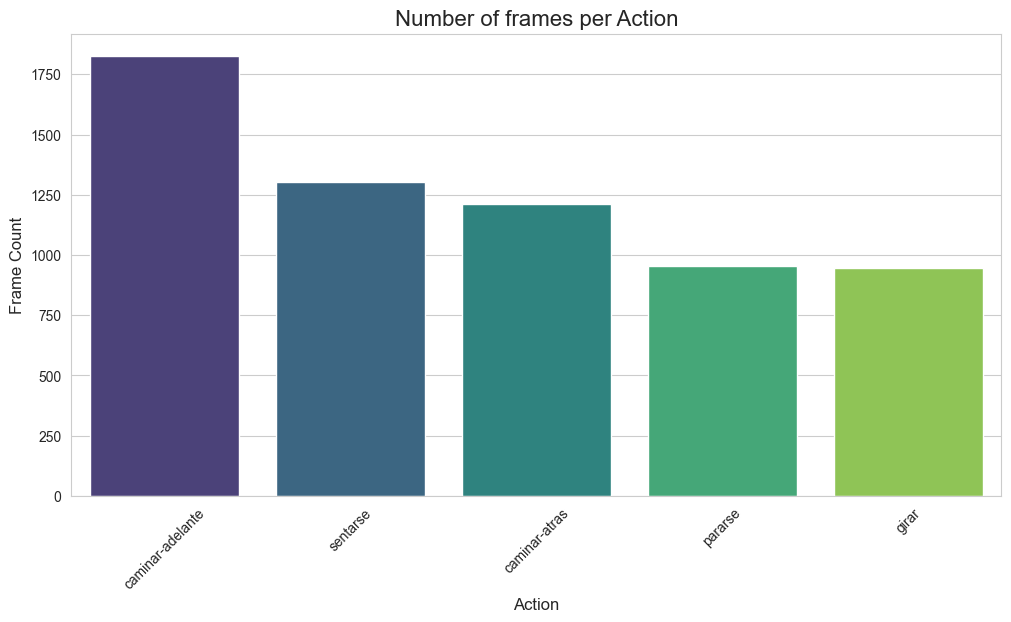

Frame counts per action:
 action
caminar-adelante    1827
sentarse            1303
caminar-atras       1213
pararse              956
girar                946
Name: count, dtype: int64


In [10]:
# --- How many frames per action? ---
action_counts = df_analisis['action'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')
plt.title('Number of frames per Action', fontsize=16)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Frame Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("Frame counts per action:\n", action_counts)

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\1834525727.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='action', y='duration_sec', data=df_analisis, palette='mako')


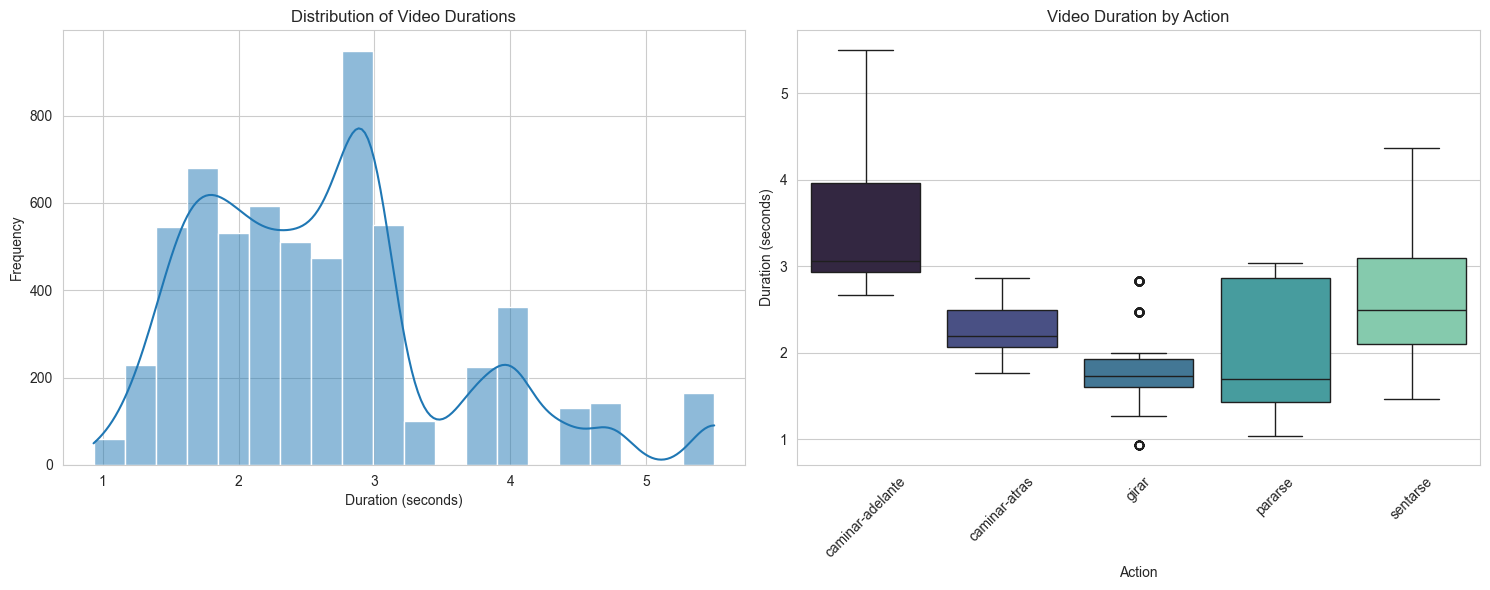

Descriptive statistics for video duration (seconds):


count    6245.000000
mean        2.623939
std         0.956250
min         0.933333
25%         1.933333
50%         2.500000
75%         3.033333
max         5.500000
Name: duration_sec, dtype: float64

In [7]:
# --- How long are the videos? ---
plt.figure(figsize=(15, 6))

# Plot 1: Histogram of all video durations
plt.subplot(1, 2, 1)
sns.histplot(df_analisis['duration_sec'], bins=20, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Plot 2: Boxplot of durations grouped by action
plt.subplot(1, 2, 2)
sns.boxplot(x='action', y='duration_sec', data=df_analisis, palette='mako')
plt.title('Video Duration by Action')
plt.xlabel('Action')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Display descriptive statistics for duration
print("Descriptive statistics for video duration (seconds):")
display(df_analisis['duration_sec'].describe())

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\2662593666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='action', y='luminance_mean', data=df_analisis, palette='rocket')


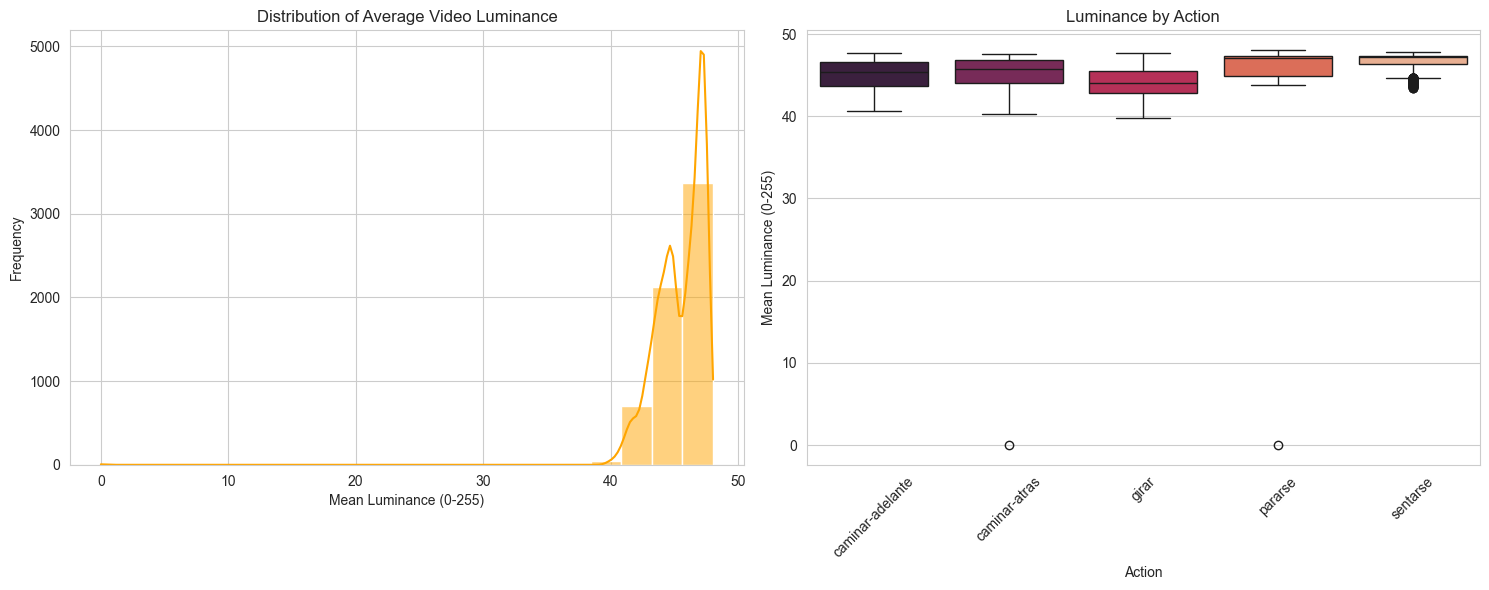

In [8]:
# --- Were lighting conditions consistent? ---
plt.figure(figsize=(15, 6))

# Plot 1: Distribution of average luminance
plt.subplot(1, 2, 1)
sns.histplot(df_analisis['luminance_mean'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average Video Luminance')
plt.xlabel('Mean Luminance (0-255)')
plt.ylabel('Frequency')

# Plot 2: Boxplot of luminance grouped by action
plt.subplot(1, 2, 2)
sns.boxplot(x='action', y='luminance_mean', data=df_analisis, palette='rocket')
plt.title('Luminance by Action')
plt.xlabel('Action')
plt.ylabel('Mean Luminance (0-255)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Part II: Analysis of Pose Landmarks (`df_pose`)

Now we dive into the core data: the 33 pose landmarks for each frame. This is where we'll find the patterns that distinguish one action from another. The data is in a "wide" format, with one row per frame.

In [14]:
# Display the first few rows of the pose dataframe
print("First 5 rows of df_pose:")
print("Dimensiones originales:", df_pose.shape)
# Check for missing values
print("\nTotal missing values in the pose dataframe:")
# Summing all NaNs in the entire dataframe
print(df_pose.isnull().sum().sum())

df_pose.head()

First 5 rows of df_pose:
Dimensiones originales: (6235, 136)

Total missing values in the pose dataframe:
0


,action,video_filename,frame_idx,timestamp_sec,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,landmark_2_z,landmark_2_vis,landmark_3_x,landmark_3_y,landmark_3_z,landmark_3_vis,landmark_4_x,landmark_4_y,landmark_4_z,landmark_4_vis,landmark_5_x,landmark_5_y,landmark_5_z,landmark_5_vis,landmark_6_x,landmark_6_y,landmark_6_z,landmark_6_vis,landmark_7_x,landmark_7_y,landmark_7_z,landmark_7_vis,landmark_8_x,landmark_8_y,landmark_8_z,landmark_8_vis,landmark_9_x,landmark_9_y,landmark_9_z,landmark_9_vis,landmark_10_x,landmark_10_y,landmark_10_z,landmark_10_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,landmark_12_z,landmark_12_vis,landmark_13_x,landmark_13_y,landmark_13_z,landmark_13_vis,landmark_14_x,landmark_14_y,landmark_14_z,landmark_14_vis,landmark_15_x,landmark_15_y,landmark_15_z,landmark_15_vis,landmark_16_x,landmark_16_y,landmark_16_z,landmark_16_vis,landmark_17_x,landmark_17_y,landmark_17_z,landmark_17_vis,landmark_18_x,landmark_18_y,landmark_18_z,landmark_18_vis,landmark_19_x,landmark_19_y,landmark_19_z,landmark_19_vis,landmark_20_x,landmark_20_y,landmark_20_z,landmark_20_vis,landmark_21_x,landmark_21_y,landmark_21_z,landmark_21_vis,landmark_22_x,landmark_22_y,landmark_22_z,landmark_22_vis,landmark_23_x,landmark_23_y,landmark_23_z,landmark_23_vis,landmark_24_x,landmark_24_y,landmark_24_z,landmark_24_vis,landmark_25_x,landmark_25_y,landmark_25_z,landmark_25_vis,landmark_26_x,landmark_26_y,landmark_26_z,landmark_26_vis,landmark_27_x,landmark_27_y,landmark_27_z,landmark_27_vis,landmark_28_x,landmark_28_y,landmark_28_z,landmark_28_vis,landmark_29_x,landmark_29_y,landmark_29_z,landmark_29_vis,landmark_30_x,landmark_30_y,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
0,caminar-adelante,10caminar.mp4,0,0.000000,0.483198,0.289883,-0.157872,0.999982,0.485738,0.282015,-0.151601,0.999928,0.487201,0.281995,-0.151599,0.999935,0.488768,0.282223,-0.151587,0.999923,0.480612,0.282979,-0.151267,0.999912,0.478745,0.283554,-0.151282,0.999913,0.477062,0.284183,-0.151287,0.999894,0.491383,0.285578,-0.102211,0.999802,0.475499,0.288514,-0.101599,0.999768,0.486436,0.298276,-0.138487,0.999969,0.480279,0.298672,-0.138282,0.999958,0.506226,0.331673,-0.065527,0.999979,0.465684,0.335292,-0.061684,0.999928,0.510797,0.391242,-0.041616,0.990445,0.458913,0.397388,-0.038146,0.986728,0.505376,0.435047,-0.090028,0.988662,0.458367,0.450141,-0.078030,0.974499,0.504126,0.450159,-0.105777,0.973821,0.457394,0.468183,-0.092867,0.946733,0.500532,0.446661,-0.120088,0.975336,0.459941,0.467577,-0.105497,0.947717,0.499826,0.442375,-0.096312,0.967602,0.461489,0.461451,-0.083943,0.939290,0.496413,0.442033,-0.001779,0.999795,0.473751,0.443537,0.001747,0.999670,0.496899,0.523998,-0.000477,0.977796,0.476517,0.522068,0.027443,0.964946,0.489090,0.596965,0.079033,0.973886,0.479101,0.583957,0.129625,0.957815,0.486929,0.602601,0.084165,0.876320,0.479325,0.589973,0.137256,0.765541,0.492572,0.627961,0.029691,0.968642,0.477141,0.610461,0.086529,0.949254
1,caminar-adelante,10caminar.mp4,1,0.033333,0.483325,0.288957,-0.130924,0.999982,0.485943,0.281579,-0.123883,0.999929,0.487630,0.281622,-0.123891,0.999935,0.489185,0.281868,-0.123890,0.999924,0.480720,0.282267,-0.124293,0.999913,0.478950,0.282684,-0.124298,0.999913,0.477333,0.283256,-0.124310,0.999894,0.491660,0.285496,-0.075811,0.999805,0.475872,0.287743,-0.077899,0.999774,0.486935,0.297324,-0.112383,0.999970,0.480304,0.297606,-0.112906,0.999959,0.506245,0.331673,-0.042780,0.999980,0.465627,0.335220,-0.045570,0.999929,0.510466,0.390814,-0.030412,0.989376,0.458908,0.397390,-0.026032,0.986056,0.505778,0.434262,-0.088026,0.987447,0.458293,0.450358,-0.061372,0.972550,0.504857,0.449816,-0.104220,0.972188,0.457399,0.468226,-0.074165,0.943587,0.501698,0.446544,-0.117462,0.973865,0.460039,0.467726,-0.088182,0.944698,0

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\3692677900.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_visibility.values, y=avg_visibility.index, palette='coolwarm')


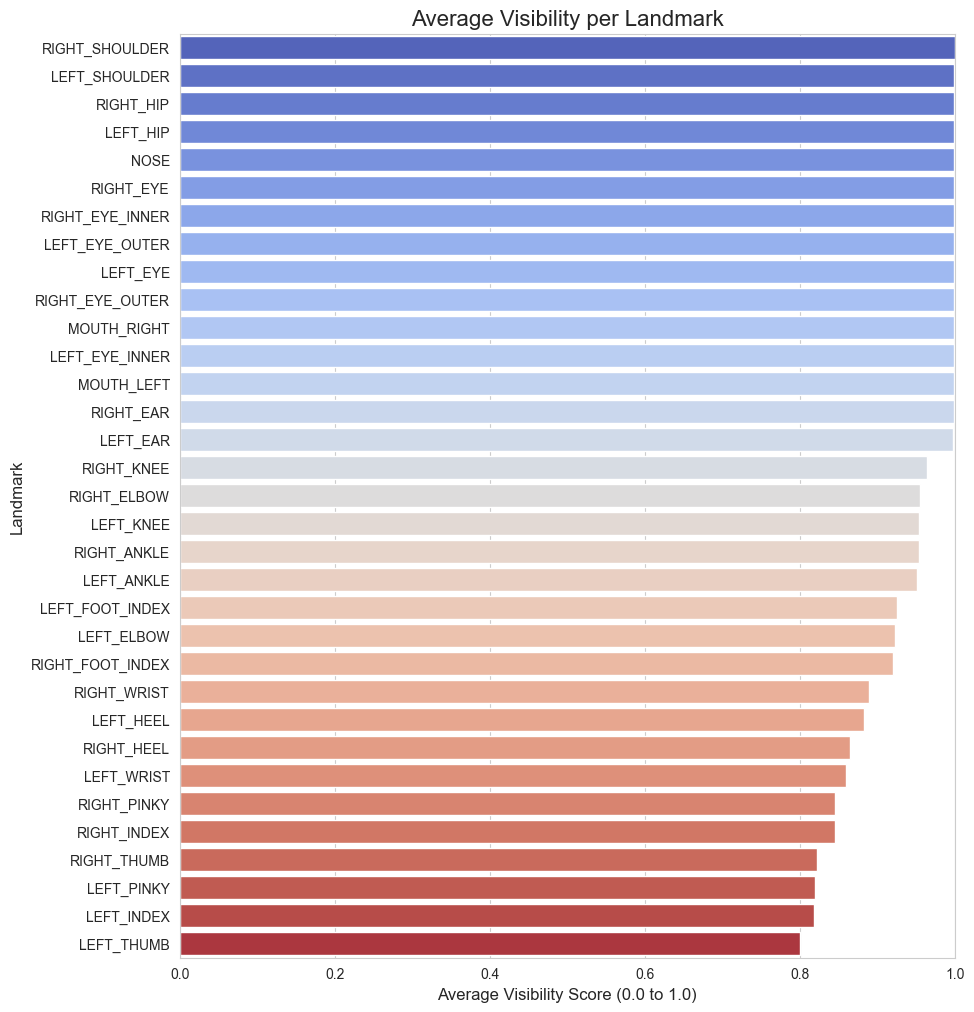

In [17]:
# --- How well did MediaPipe see the landmarks? ---

# Extract all visibility columns
vis_cols = [col for col in df_pose.columns if 'vis' in col]
avg_visibility = df_pose[vis_cols].mean().sort_values(ascending=False)

# Get landmark names for better labels
landmark_names = [mp.solutions.pose.PoseLandmark(i).name for i in range(33)]
avg_visibility.index = [landmark_names[int(i.split('_')[1])] for i in avg_visibility.index]


plt.figure(figsize=(10, 12))
sns.barplot(x=avg_visibility.values, y=avg_visibility.index, palette='coolwarm')
plt.title('Average Visibility per Landmark', fontsize=16)
plt.xlabel('Average Visibility Score (0.0 to 1.0)', fontsize=12)
plt.ylabel('Landmark', fontsize=12)
plt.xlim(0, 1) # Visibility is a score from 0 to 1
plt.show()

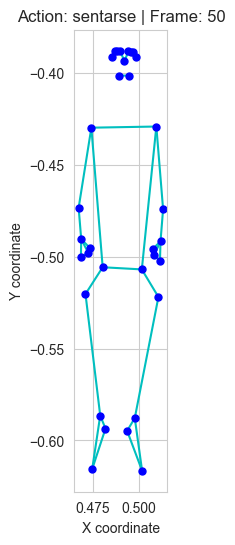

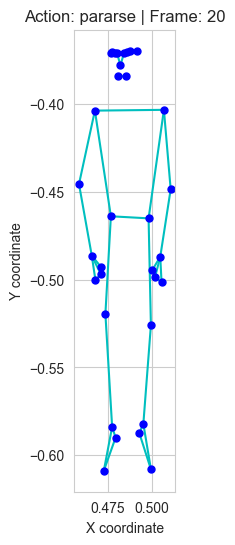

In [22]:
# --- Let's plot a skeleton to see what the data looks like ---

# MediaPipe's standard connections for drawing the skeleton
POSE_CONNECTIONS = mp.solutions.pose.POSE_CONNECTIONS

def plot_pose(frame_data: pd.Series):
    """Plots a 2D skeleton from a single row of the df_pose DataFrame."""
    landmarks = []
    for i in range(33):
        x = frame_data[f'landmark_{i}_x']
        y = frame_data[f'landmark_{i}_y']
        landmarks.append((x, y))

    plt.figure(figsize=(6, 6))
    
    # Plot connections
    for connection in POSE_CONNECTIONS:
        start_idx = connection[0]
        end_idx = connection[1]
        if landmarks[start_idx] and landmarks[end_idx]:
            x_vals = [landmarks[start_idx][0], landmarks[end_idx][0]]
            y_vals = [-landmarks[start_idx][1], -landmarks[end_idx][1]] # Invert Y for intuitive plotting
            plt.plot(x_vals, y_vals, 'c-')

    # Plot landmarks
    for x, y in landmarks:
        plt.plot(x, -y, 'bo', markersize=5)
    
    plt.title(f"Action: {frame_data['action']} | Frame: {frame_data['frame_idx']}")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# --- Example: Visualize a pose from someone "sentarse" (sitting) ---
sit_frame = df_pose[df_pose['action'] == 'sentarse'].iloc[50] 
plot_pose(sit_frame)

# --- Example: Visualize a pose from someone "pararse" (standing) ---
stand_frame = df_pose[df_pose['action'] == 'pararse'].iloc[20]
plot_pose(stand_frame)

### 4.4. Comparing Landmark Distributions Across Actions

This is where we confirm our hypotheses. For example, when sitting (`sentarse`), the hips should be lower than when standing (`pararse`). Let's visualize this. The `y` coordinate represents the vertical position.

C:\Users\Mariana\AppData\Local\Temp\ipykernel_26640\923752975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='action', y='hip_y_avg', data=df_pose, palette='viridis')


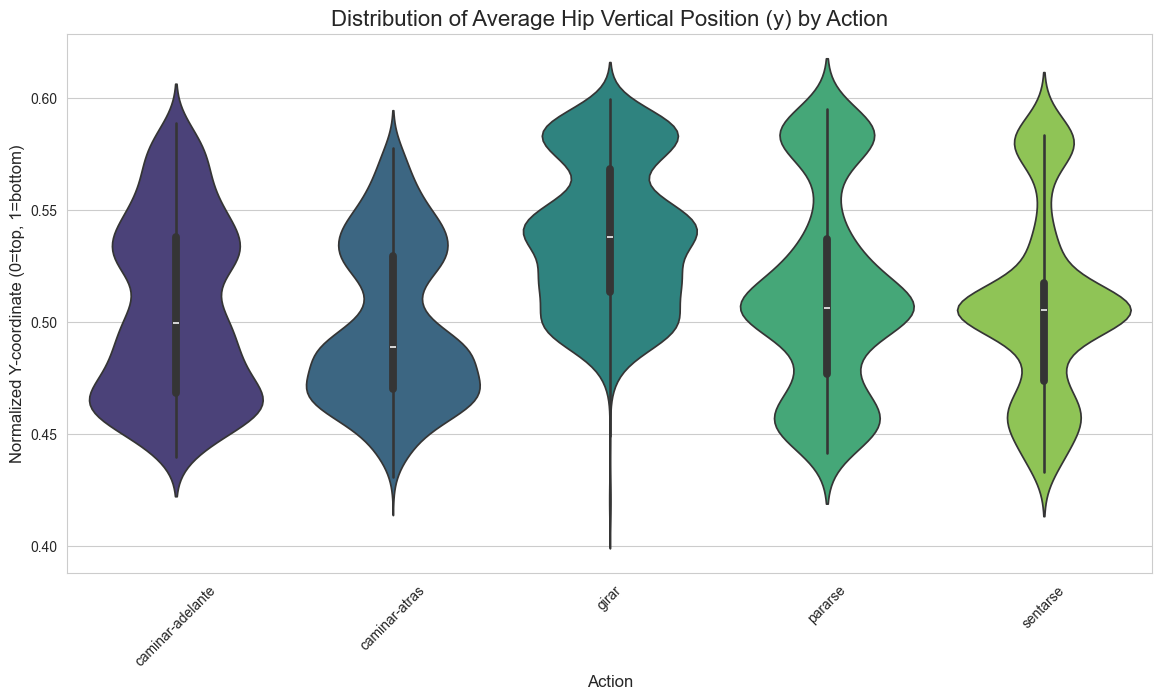

In [23]:
# Let's analyze the vertical position of the hips
# Landmark 23: LEFT_HIP, Landmark 24: RIGHT_HIP
df_pose['hip_y_avg'] = (df_pose['landmark_23_y'] + df_pose['landmark_24_y']) / 2

plt.figure(figsize=(14, 7))
sns.violinplot(x='action', y='hip_y_avg', data=df_pose, palette='viridis')
plt.title('Distribution of Average Hip Vertical Position (y) by Action', fontsize=16)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Normalized Y-coordinate (0=top, 1=bottom)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 5. Conclusions & Next Steps

Based on this initial analysis:

1.  **Data Quality:** The dataset appears well-balanced across the 5 actions. Landmark visibility is generally high, though lower body parts like heels and feet are less consistently tracked, which is expected.
2.  **Key Features:** Simple features like the vertical position of the hips (`hip_y_avg`) already show a strong separation between classes like `sentarse` and `pararse`. This is very promising.
3.  **Action Characteristics:** We observed variations in video duration and lighting, but they don't seem extreme enough to be a major issue.

**Next Steps for the Project:**

* **Feature Engineering:** The most critical next step. [cite_start]We need to create more robust features from the raw landmark coordinates[cite: 34]. This includes:
    * [cite_start]**Angles:** Calculate joint angles (e.g., knee bend, hip angle, elbow angle)[cite: 30, 36].
    * **Distances:** Compute relative distances between key points (e.g., distance between hand and shoulder).
    * [cite_start]**Velocities:** Calculate the speed of key landmarks between frames[cite: 35].
* [cite_start]**Data Normalization:** We must normalize the coordinates to be independent of the person's position and size within the frame[cite: 32]. A common method is to center the pose around the hips.
* [cite_start]**Model Training:** With the engineered features, we can train classification models like SVM, Random Forest, or XGBoost as suggested in the project guidelines[cite: 40].